In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
datae = pd.read_csv('Social_Network_Ads - Copy.csv')
datae

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [27]:
datae.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


# Visualisation

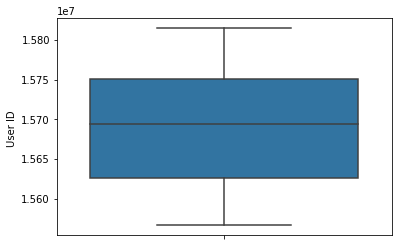

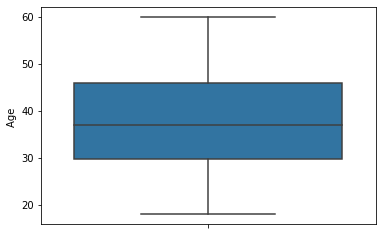

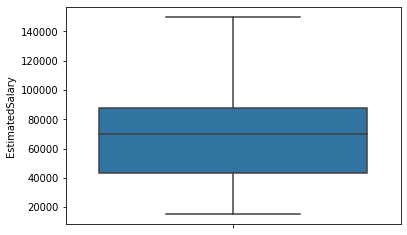

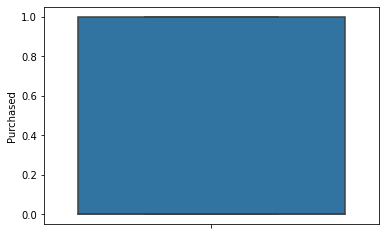

In [3]:
df1 = datae.select_dtypes([np.int64, np.float])

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.boxplot(y=col, data=df1)

No outliers 

<Figure size 432x288 with 0 Axes>

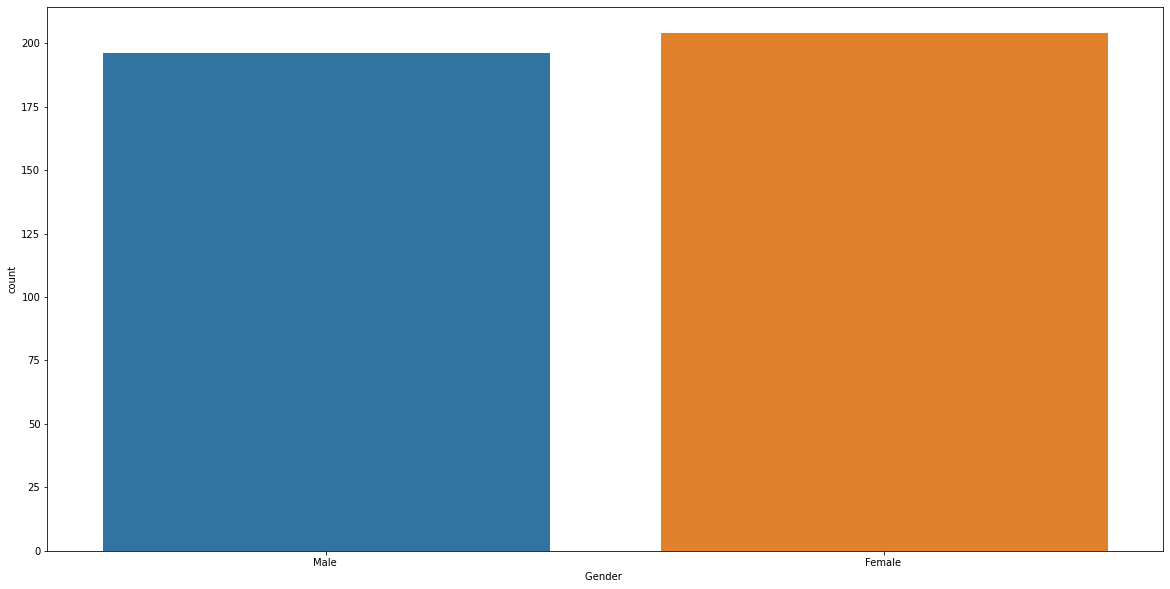

In [4]:
#Male and Female count
df2 = datae.select_dtypes([np.object])
for i,col in enumerate(df2.columns):
  plt.figure(i)
  fig_dims = (20, 10)
  fig, ax = plt.subplots(figsize=fig_dims)
  sns.countplot(x = col, data = df2, ax = ax)

In [6]:
from sklearn.preprocessing import LabelEncoder

y = datae['Gender ']
label_encoder = LabelEncoder()
datae['Gender '] = label_encoder.fit_transform(y)

# MOdel IMplementation

In [7]:
X = datae.drop('Purchased', axis = 1)
y = datae['Purchased']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [13]:
model = CatBoostClassifier(iterations=50)

In [17]:
model.fit(X_train,y_train,plot=False)
print('\n Model Trainied')

# predict the target on the train dataset
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)

Learning rate set to 0.093307
0:	learn: 0.6451106	total: 71.7ms	remaining: 3.51s
1:	learn: 0.6185997	total: 72.6ms	remaining: 1.74s
2:	learn: 0.5854711	total: 74ms	remaining: 1.16s
3:	learn: 0.5601334	total: 75.2ms	remaining: 865ms
4:	learn: 0.5372012	total: 76.4ms	remaining: 688ms
5:	learn: 0.5153385	total: 77.5ms	remaining: 568ms
6:	learn: 0.4897670	total: 78.5ms	remaining: 482ms
7:	learn: 0.4704227	total: 79.4ms	remaining: 417ms
8:	learn: 0.4551261	total: 80.4ms	remaining: 366ms
9:	learn: 0.4393231	total: 81.3ms	remaining: 325ms
10:	learn: 0.4287102	total: 81.7ms	remaining: 290ms
11:	learn: 0.4161617	total: 82.6ms	remaining: 262ms
12:	learn: 0.4034555	total: 83.4ms	remaining: 237ms
13:	learn: 0.3918660	total: 84.3ms	remaining: 217ms
14:	learn: 0.3811773	total: 85.2ms	remaining: 199ms
15:	learn: 0.3733765	total: 86.1ms	remaining: 183ms
16:	learn: 0.3638590	total: 87.4ms	remaining: 170ms
17:	learn: 0.3553027	total: 89ms	remaining: 158ms
18:	learn: 0.3465091	total: 90ms	remaining: 147m

Got accuracy of 0.933